In [3]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cardio = pd.read_csv('cardio_train.csv',sep=";")


In [5]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data Cleaning

In [6]:
cardio = pd.DataFrame(cardio)

#Age is written in days, so we convert it to years 
cardio['age'] = (cardio['age']/365).round(0)

#Check age
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# Convert gender to binary values: 0 women, 1 men
cardio["gender"] = cardio["gender"] % 2
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,0,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,0,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


# EDA

In [8]:
#Check cells
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,0,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,0,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


### ID not important, will be dropped for better visualisation

In [9]:
eda = cardio.drop(columns = ['id'])
eda.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,0.650429,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### ap_hi and ap_lo max are too high. Both are in the ten thousands range, which is impossible for normal human being. Thus, require closer look at.

# Checking factors overall correlation

<AxesSubplot: >

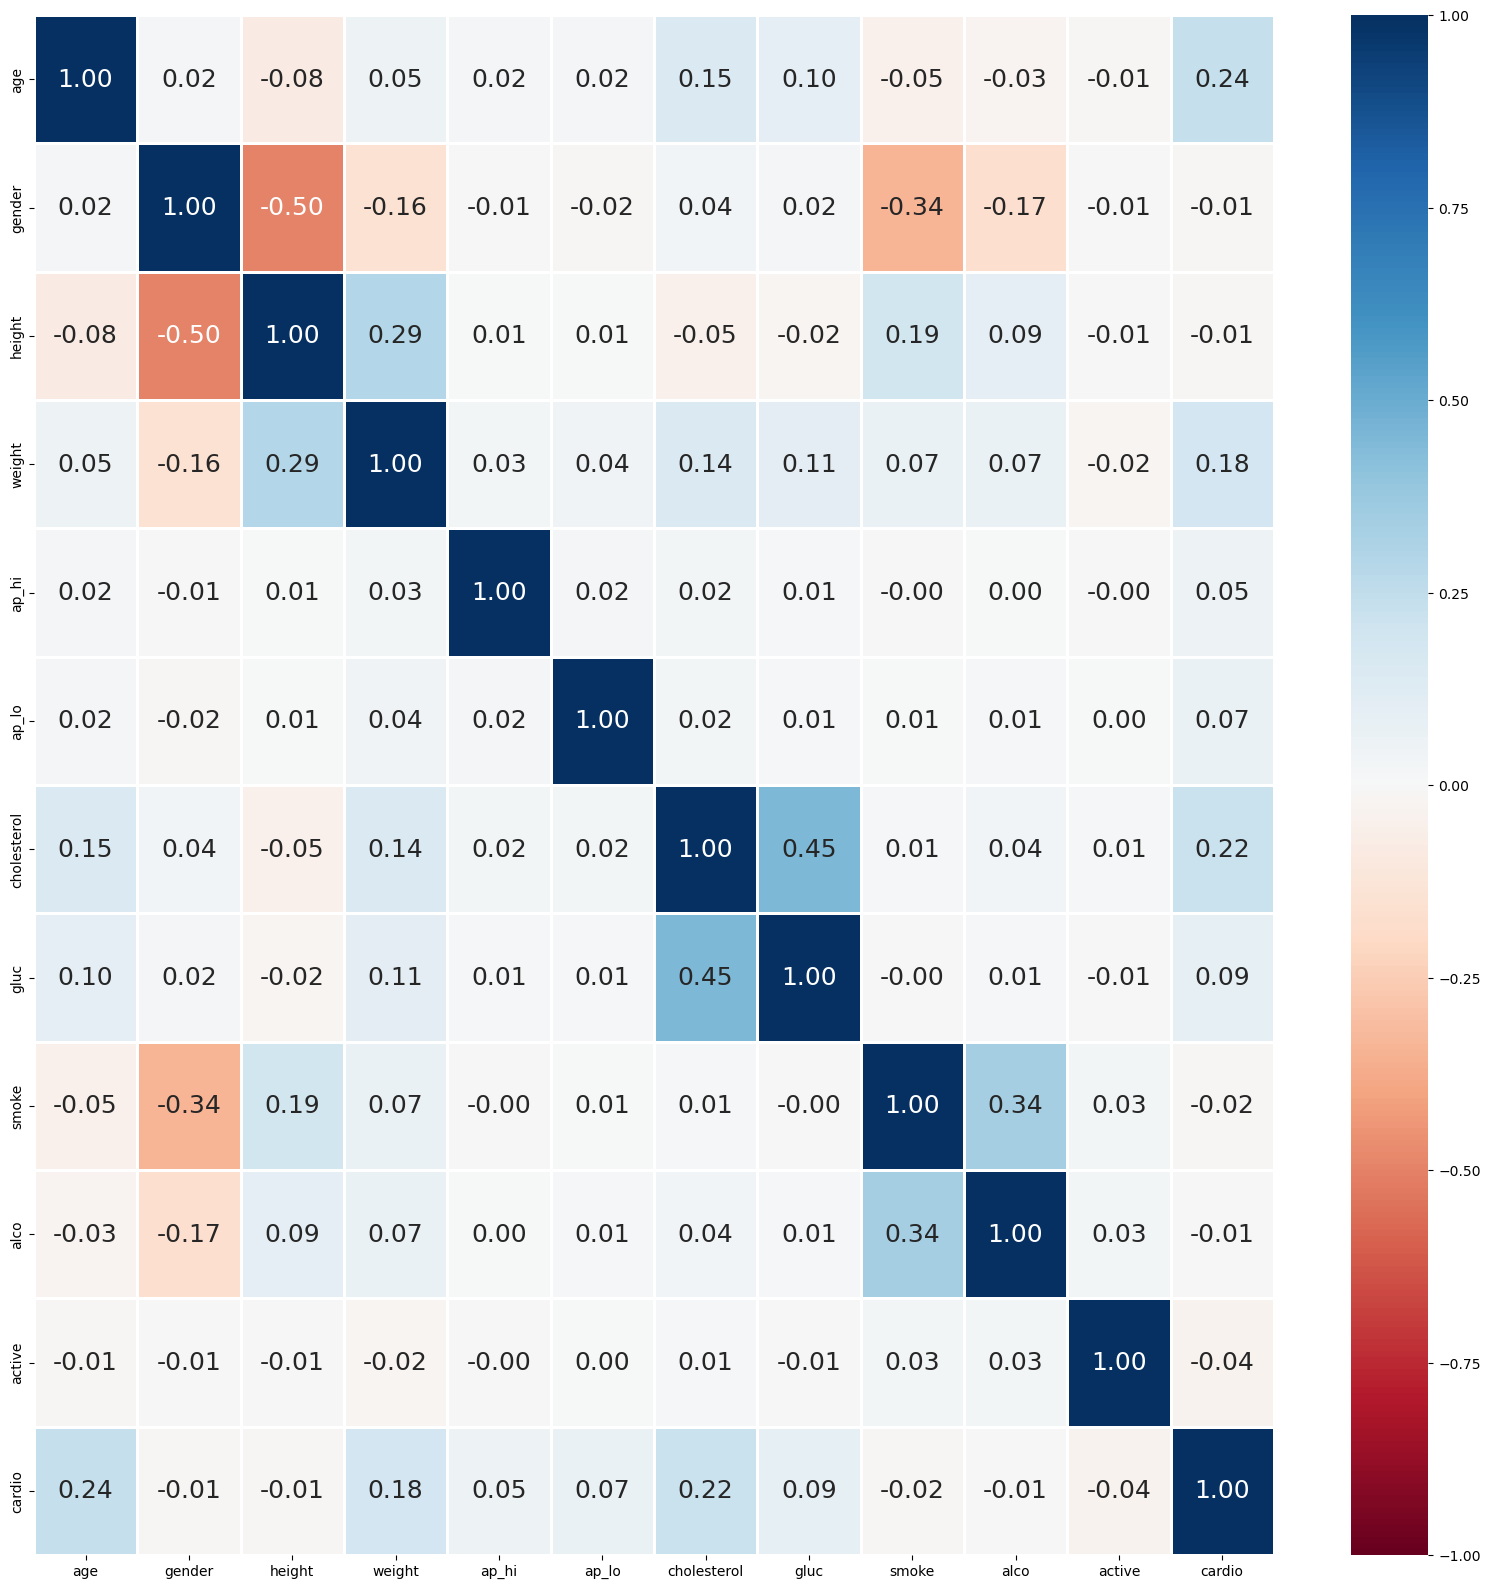

In [24]:
#print heat map
f, axes = plt.subplots(1,1, figsize = (20,20))

sb.heatmap(eda.corr(), vmin = -1, vmax = 1, linewidths =1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Cholesterol, age and weight shows medium, but positive correlation in relation to cardiovascular disease. 

### Other things to note:
### Strong positive correlation between: gluc and cholesterol, smoke and gender

### Low correlation between smoke and age, height and cardio

# Systolic Blood Pressure

In [10]:
eda['ap_hi'].mean()

128.8172857142857

In [11]:
eda['ap_hi'].min()


-150

In [12]:
eda['ap_hi'].max()


16020

### Systolic Blood Pressure min and max are too low and high for normal humans.

In [13]:
eda.loc[eda['ap_hi']==-150]
#values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35040,64.0,0,168,59.0,-150,80,1,1,0,0,1,1


In [14]:
eda.loc[eda['ap_hi']==16020]
#values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40852,48.0,1,169,70.0,16020,80,1,1,0,0,0,1


### Will need to remove minimum and maximum systolic blood pressure 

# DIASTOLIC BLOOD PRESSURE

In [15]:
eda['ap_lo'].mean()

96.63041428571428

In [16]:
eda['ap_lo'].min()

-70

In [17]:
eda['ap_lo'].max()

11000

### Both -70 and 11000 are too high, and thus not applicable to our data. Will need to be removed.

In [18]:
eda.loc[eda['ap_lo']==-70]
# values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,62.0,1,167,74.0,15,-70,1,1,0,0,1,1


In [19]:
eda.loc[eda['ap_lo']==11000]
# values location

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
43326,64.0,1,160,105.0,200,11000,1,1,0,0,1,1


# Comparing Systolic and Diastolic Blood Pressure

In [20]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(eda[eda['ap_lo']> eda['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


### Cases diastolic pressure is higher than systolic, which is not correct.

In [21]:
print("Diastilic pressure is negative for {0} cases".format(eda[eda['ap_lo']< 0].shape[0]))

Diastilic pressure is negative for 1 cases


In [22]:
print("Systolic pressure is negative for {0} cases".format(eda[eda['ap_lo']> eda['ap_hi']].shape[0]))

Systolic pressure is negative for 1234 cases


Diastilic pressure is higher than systolic one in 1234 cases


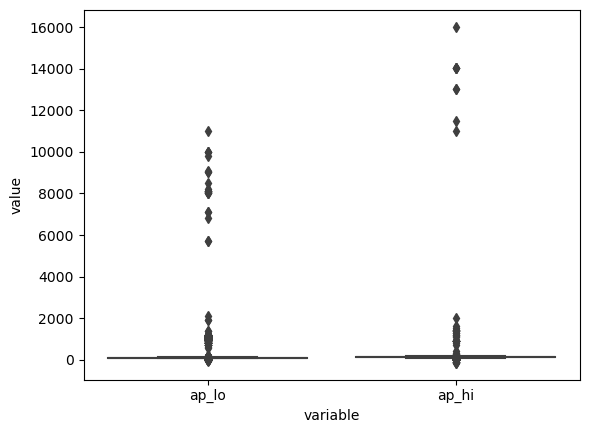

In [23]:
blood_pressure = eda.loc[:,['ap_lo','ap_hi']]
sb.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(eda[eda['ap_lo']> eda['ap_hi']].shape[0]))

### These are outliers that will be removed during data cleaning

# Cardio

<AxesSubplot: ylabel='cardio'>

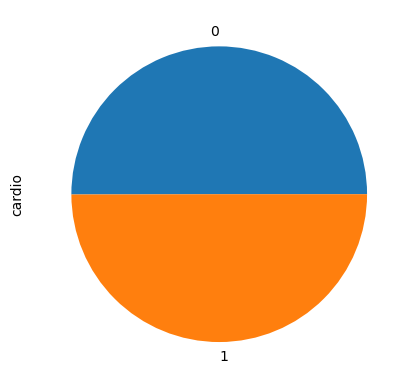

In [19]:
eda["cardio"].value_counts().plot(kind='pie')

### Data well balanced, thus no need to rebalance it.

# Gender

<AxesSubplot: ylabel='gender'>

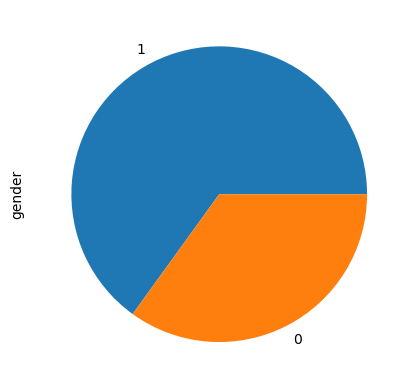

In [22]:
eda["gender"].value_counts().plot(kind='pie')
# 0 women, 1 men

### Data not that well balanced, as there are more men than women. 

# Interesting Findings

C:\Users\ryanc\AppData\Local\Temp\ipykernel_28352\1897544191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(eda['height'][eda['cardio']==0],color='blue')
C:\Users\ryanc\AppData\Local\Temp\ipykernel_28352\1897544191.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(eda['height'][eda['cardio'

<AxesSubplot: xlabel='height', ylabel='Density'>

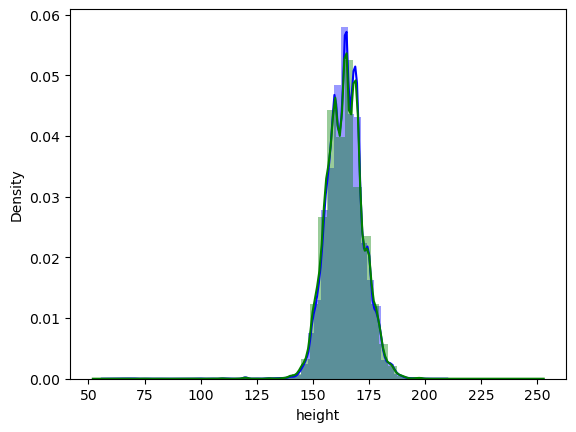

In [21]:
sb.distplot(eda['height'][eda['cardio']==0],color='blue')
sb.distplot(eda['height'][eda['cardio']==1],color='green')

### Both follow similar trends, thus we can conclude cardiovasuclar disease not affected by height.